In [1]:
%matplotlib inline
import numpy as np
from matplotlib import rc
import deepdish as dd

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 20}

rc('font', **font)
#rc('text',usetex=True)
import matplotlib.pyplot as plt
import h5py

In [2]:
def get_index_number(n, z = None, z_index = None):

    all_n = np.arange(-10, 2.5 ,0.5) # we cut off n = 2.5, 3, 3.5, 4 because Cloudy

    all_z = [0.0000e+00, 1.2202e-01, 2.5893e-01, 4.1254e-01, 5.8489e-01, 7.7828e-01, 9.9526e-01, 1.2387e+00,
             1.5119e+00, 1.8184e+00, 2.1623e+00, 2.5481e+00, 2.9811e+00, 3.4668e+00, 4.0119e+00, 4.6234e+00,
             5.3096e+00, 6.0795e+00, 6.9433e+00, 7.9125e+00, 9.0000e+00, 1.0220e+01, 1.1589e+01, 1.3125e+01,
             1.4849e+01]

    
    index1 = np.argmin( np.abs(all_n - n))
    
    if (z_index is None) and (z is None):
        index2 = 0 # redshift zero
        rshift = 0
    elif z_index is None:
        index2 = np.argmin( np.abs(all_z - z))
        rshift = index2
    elif z is None:
        if z_index < 0:
            z_index = np.size(all_z) + z_index
            
        index2 = z_index
        rshift = all_z[index2]
    else:
        print "Cannot provide both a redshift value and redshift bin value"
        raise ValueError
        
    
    run_num = (index1)*len(all_z) + (index2 + 1)
    

    
    return index1, index2, run_num, rshift
    

#j = 0
#for i in np.arange(1, 626,1):
#    
#    n_z_list[i-1] = (all_n[j], all_z[(i-1) % (np.size(all_z))])
    
#    j = j + 1
#    if j >= np.size(all_n):
#        j = 0
        
#n_z_dict = {}
#
#i = 1
#for t in n_z_list:
#    n_z_dict[t] = i
#    i = i + 1
    
#i = 1
#n_z_dict_2 = {}
#for t in n_z_list:
#    n_z_dict_2[(t[0], (i-1)%(np.size(all_z)))] = i
#    i = i + 1

In [3]:
data_type = 'shielded'

data_path = './'
data_path = '/home/emerick/code/grackle-emerick/input/'

cloudy_path = '/home/emerick/work/cloudy_tables/HM_2011'

e_path = cloudy_path + '/hm_2011_sh_final_CR/'
nox_path      = cloudy_path + '/hm_2011_sh_noxray_cr/'
lcr_path    = cloudy_path + '/hm_2011_sh_lesscr/'



if data_type == 'thin':
    data = h5py.File(data_path + 'CloudyData_UVB=HM2012.h5')
elif data_type == 'shielded':
    data = h5py.File(data_path + 'CloudyData_UVB=HM2012_shielded.h5')
elif data_type == 'shielded_cooling_only':
    data = dd.io.load(data_path + 'CloudyData_UVB=HM2012_shielded_cooling_only.h5')
elif data_type == 'noUVB':
    data = dd.io.load(data_path + 'CloudyData_noUVB.h5')
    
#data = h5py.File('./CloudyData_UVB=HM2012_shielded_cooling_only.h5')
#data = dd.io.load('./CloudyData_UVB=HM2012_shielded.h5')
#data = h5py.File('CloudyData_UVB=HM2012.h5')
#data = h5py.File('CloudyData_noUVB.h5')

In [4]:
metal_cool = data['CoolingRates']['Metals']['Cooling']

try:
    metal_heat = data['CoolingRates']['Metals']['Heating']
except:
    print 'failed to load heating'

prim_cool  = data['CoolingRates']['Primordial']['Cooling']
try:
    prim_heat  = data['CoolingRates']['Primordial']['Heating']
except:
    print 'failed to load heating'

In [14]:
#
#
# Choose your n and z here
#
#
plot_n  = [-1, -0.5, 0, 0.5]
z       = None
z_index = 0

Z = 0.1  # metallicity

-1 None 0
-0.5 None 0
0 None 0
0.5 None 0
noxray run number 1
noxray run number 6
noxray run number 11
noxray run number 16


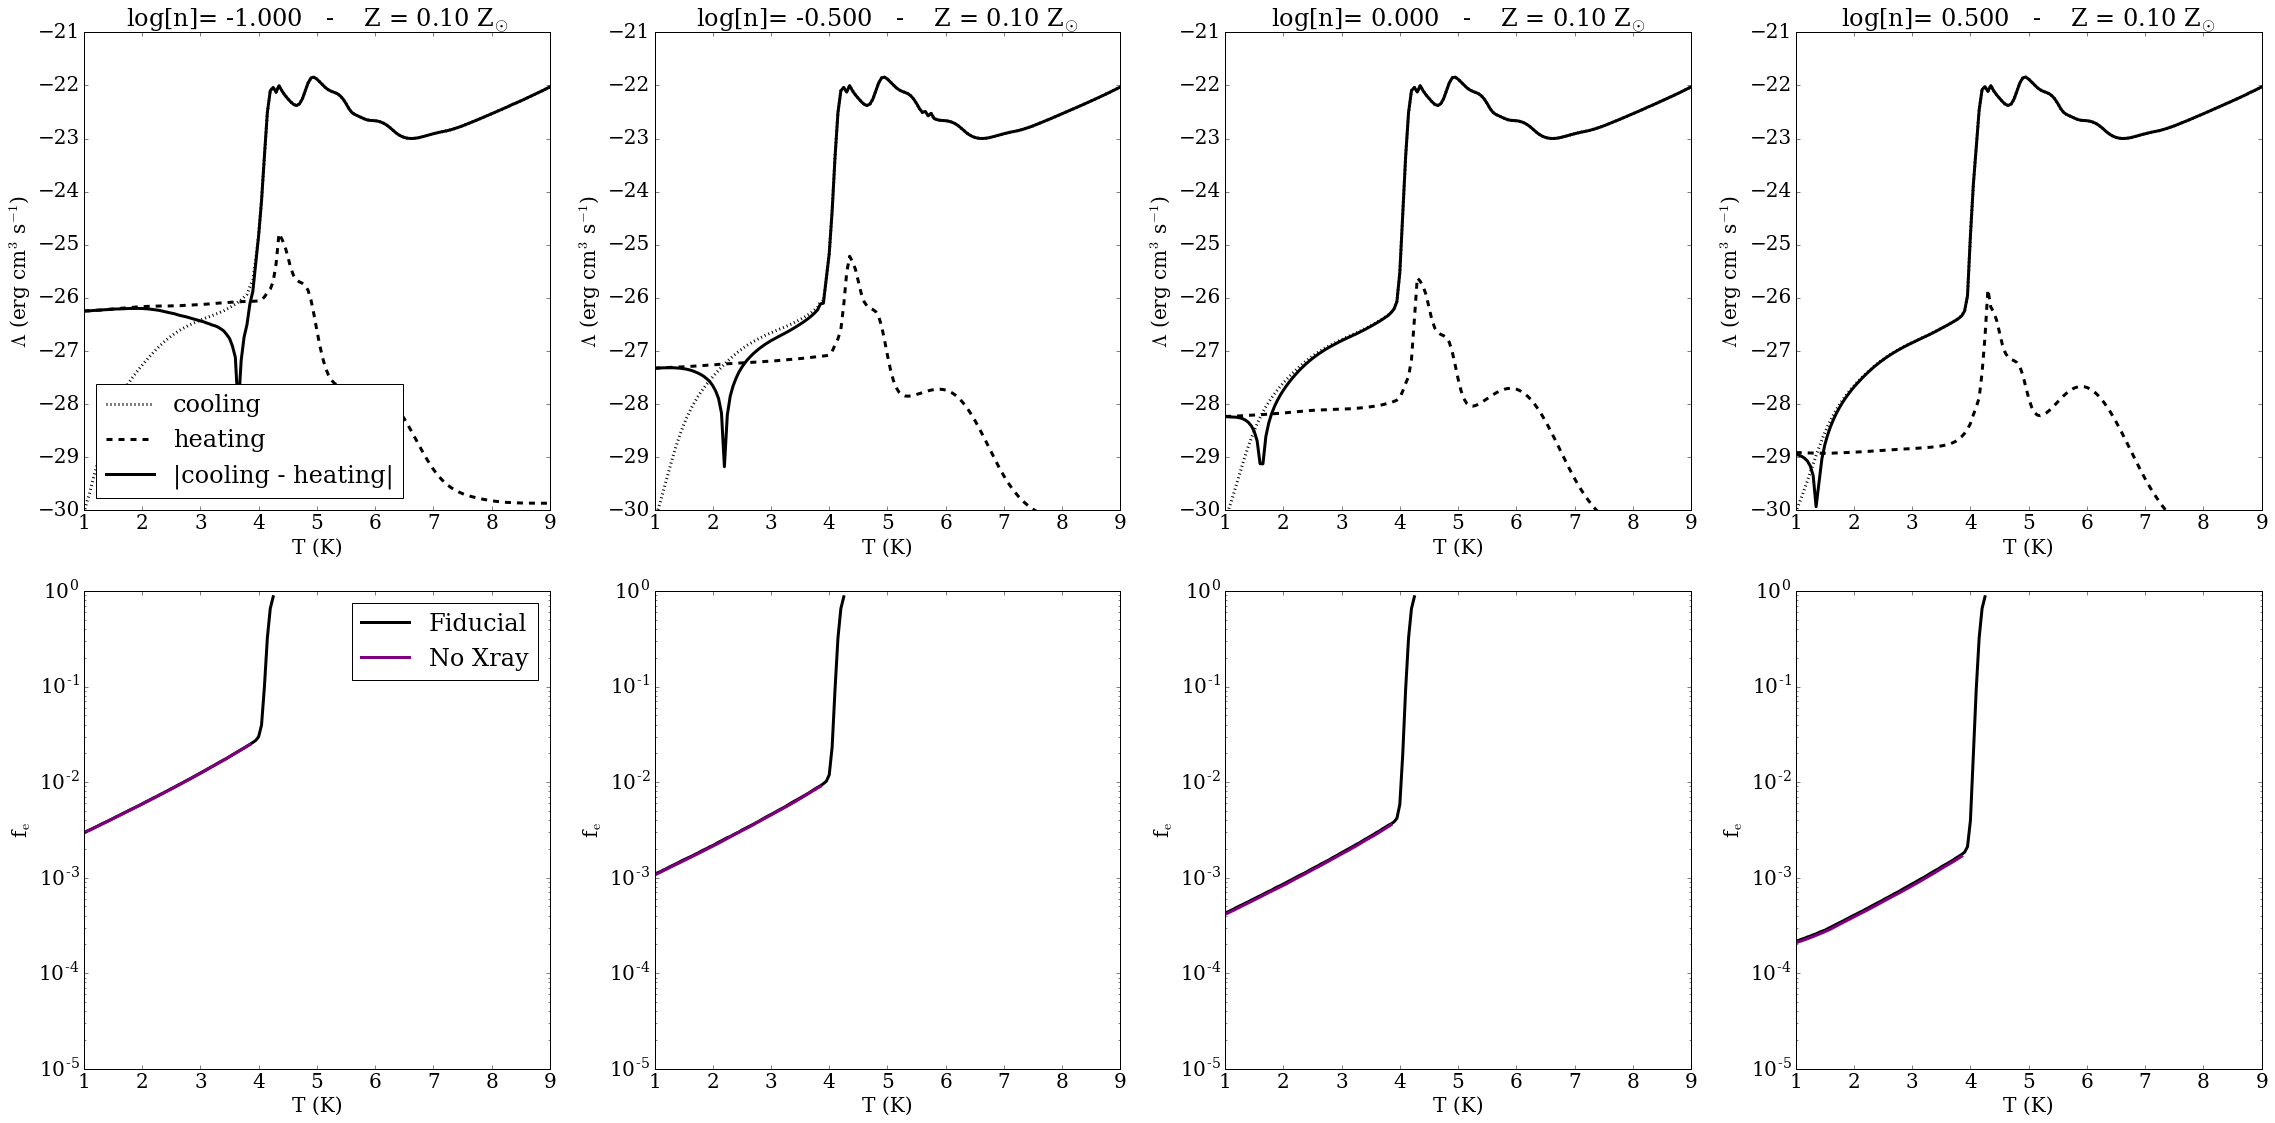

In [15]:

T = np.logspace(1,9,161)
T = np.log10(T)

fig, ax = plt.subplots(2,4)

j = 0
for i in [(0,0),(0,1),(0,2),(0,3)]:
    
    n = plot_n[j]
    
    print n, z, z_index
    index1, index2, run_num, rshift = get_index_number(n, z = z, z_index = z_index)
    
    total_cool = metal_cool[index1][index2] * Z + prim_cool[index1][index2]

    total_heat = metal_heat[index1][index2] * Z + prim_heat[index1][index2]
    net = total_cool - total_heat
    
    ax[i].plot(T, np.log10(total_cool), lw = 3, color = 'black', ls = ':', label = 'cooling')
    
    ax[i].plot(T, np.log10(total_heat), lw = 3, color = 'black', ls = '--', label = 'heating')
        
    ax[i].plot(T, np.log10(np.abs(net)), lw = 3, color = 'black', ls = '-', label = '|cooling - heating|')
        
    if i == (0,0):
        ax[i].legend(loc='best')
        
    ax[i].set_xlabel('T (K)')
    ax[i].set_ylabel(r'$\Lambda$ (erg cm$^{3}$ s$^{-1}$)')
    
    ax[i].set_title(r'log[n]= %.3f   -    Z = %0.2f Z$_{\odot}$'%(n,Z))


    ax[i].xaxis.set_ticks(np.arange(1,9.1,1))
    
    ax[i].set_xlim(1,9)
    ax[i].set_ylim(-30, -21)
    j = j + 1

j = 0
for i in [(1,0),(1,1),(1,2),(1,3)]:
    
    n = plot_n[j]
    index1, index2, run_num, rshift = get_index_number(n, z = z, z_index = z_index)
    
    e_data = np.genfromtxt(e_path + 'hm_2011_sh_run%i.electron'%(run_num), names =True)
    
    f_e = e_data['n_e'] / e_data['n_H']
    T_e = e_data['Te']
    
    ax[i].plot(np.log10(T_e), f_e, lw = 3, color = 'black', ls = '-', label = 'Fiducial')
    
    
    if z_index in [0,6,10,14,17]:
        # 6/1 I've only computed new models with z = 0 and z = 1 at select densities
        # so the indices don't match up --- hence being ad hoc about this
        zxd = {0:1, 6:2, 10:3, 14:4, 17:5}
        z_x = zxd[z_index]
            
        noxnum = j*len(zxd.keys()) + z_x
        
        print 'noxray run number', noxnum
        nox_data = np.genfromtxt(nox_path + 'hm_2011_sh_run%i.electron'%(noxnum),names=True)
        #lcr_data = np.genfromtxt(lcr_path + 'hm_2011_sh_run%i.electron'%(noxnum), names=True)
        
        ax[i].plot( np.log10(nox_data['Te']), nox_data['n_e'] / nox_data['n_H'],
                             lw = 3, ls = '-', color = 'purple', label = 'No Xray')
        
        #ax[i].plot( np.log10(lcr_data['Te']), lcr_data['n_e'] / lcr_data['n_H'],
        #                     lw = 3, ls = '--', color = 'orange', label = 'No Xray - 0.01 CR')        
    
    
        if i == (1,0):
            ax[i].legend(loc='best')
    
    ax[i].set_xlabel('T (K)')
    ax[i].set_ylabel(r'f$_{\rm e}$')
    ax[i].set_xlim(1,9)
    ax[i].xaxis.set_ticks(np.arange(1,9.1,1))
    
    ax[i].set_ylim(1.0E-5,1.0)
    ax[i].semilogy()
    
    
    j = j + 1

fig.set_size_inches(32,16)
plt.tight_layout()
plt.show()

if data_type == 'thin':
    fig.savefig('cooling_electron_opticallythin.png')
elif data_type == 'shielded':
    fig.savefig('cooling_electron_shielded_z%0.4f.png'%(rshift))
elif data_type == 'shielded_cooling_only':
    fig.savefig('cooling_electron_shielded_cooling_only.png')
elif data_type == 'noUVB':
    fig.savefig('cooling_electron_noUVB.png')

In [7]:
thin   = h5py.File('./CloudyData_UVB=HM2012.h5')
shield = h5py.File('./CloudyData_UVB=HM2012_shielded.h5')
    
thin_metal_c = thin['CoolingRates']['Metals']['Cooling']
thin_metal_h = thin['CoolingRates']['Metals']['Heating']

shield_metal_c = shield['CoolingRates']['Metals']['Cooling']
shield_primordial_c = shield['CoolingRates']['Primordial']['Cooling']

shield_metal_h = shield['CoolingRates']['Metals']['Heating']
shield_primordial_h = shield['CoolingRates']['Primordial']['Heating']

KeyError: "Unable to open object (Object 'coolingrates' doesn't exist)"

In [ ]:

Z = 

plot_n = [-2, -1, 0, 1, 2, 3]

fig, ax = plt.subplots(2,3)
print Z

axis_tuple = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]

for i in [0,1,2,3,4,5]:
    
    n = plot_n[i]
    
    index1 = np.argmin(np.abs(narray - n))
    
    index2 = 0  
    
    #
    # Plot Forbes et al. type cooling
    # this should be shielded primordial + optically thin metal
    #
    total_cool = thin_metal_c[index1][index2] * Z + shield_primordial_c[index1][index2]
    total_heat = thin_metal_h[index1][index2] * Z + shield_primordial_h[index1][index2]
    net = total_cool - total_heat
    
    i = axis_tuple[i]
    
#    ax[i].plot(T, np.log10(total_cool), lw = 3, color = 'orange', ls = ':')
#    ax[i].plot(T, np.log10(total_heat), lw = 3, color = 'orange', ls = '--')    
    ax[i].plot(T, np.log10(np.abs(net)), lw = 3, color = 'orange', ls = '-', label = 'Inconsistent Model')
    
    total_cool = shield_metal_c[index1][index2] * Z + shield_primordial_c[index1][index2]
    total_heat = shield_metal_h[index1][index2] * Z + shield_primordial_h[index1][index2]
    net = total_cool - total_heat    
    #ax[i].plot(T, np.log10(total_cool), lw = 3, color = 'black', ls = ':')
    #ax[i].plot(T, np.log10(total_heat), lw = 3, color = 'black', ls = '--')       
    ax[i].plot(T, np.log10(np.abs(net)), lw = 3, color = 'black', ls = '-', label = 'Metal Consistent Model')
        
    if i == 0:
        ax[i].legend(loc='best')
    ax[i].set_xlabel('T (K)')
    ax[i].set_ylabel(r'$\Lambda$ (erg cm$^{3}$ s$^{-1}$)')
    
    ax[i].set_title(r'n = %.3f   -    Z = %0.2f Z$_{\odot}$'%(10**n,Z))


    ax[i].xaxis.set_ticks(np.arange(1,9.1,1))
    
    ax[i].set_xlim(1,9)
    ax[i].set_ylim(-30, -21)



fig.set_size_inches(24,16)
plt.tight_layout()
plt.show()

fig.savefig('cooling_model_comparison')